In [2]:
import kagglehub
nehalbirla_vehicle_dataset_from_cardekho_path = kagglehub.dataset_download('nehalbirla/vehicle-dataset-from-cardekho')

print('Data source import complete.')


Using Colab cache for faster access to the 'vehicle-dataset-from-cardekho' dataset.
Data source import complete.


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv')
df.shape

(4340, 8)

In [5]:
def rename_col(s):
    s = s.replace(' ', '_')
    s = s.replace('-', '_')
    a = s.split('_')
    for i in range(len(a)):
        if not all([c == c.upper() for c in a[i]]):
            a[i] = a[i].capitalize()
    return '_'.join(a)

df.columns = [rename_col(c) for c in df.columns]
df.columns

Index(['Name', 'Year', 'Selling_Price', 'Km_Driven', 'Fuel', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')

In [6]:
df.head()

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Number of Cars by Fuel Type

**How many cars are there in the dataset by fuel type?**


[Q1] Number of Cars by Fuel Type:
 Fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64


Text(0, 0.5, 'Count')

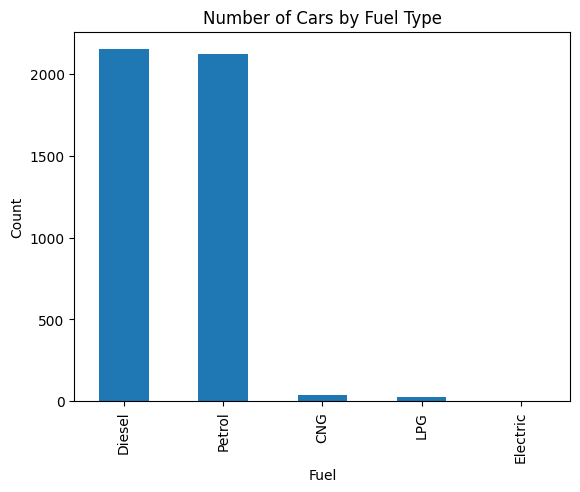

In [7]:
q1 = df['Fuel'].value_counts()
print("\n[Q1] Number of Cars by Fuel Type:\n", q1)

ax = q1.plot(kind='bar', title='Number of Cars by Fuel Type')
ax.set_xlabel('Fuel')
ax.set_ylabel('Count')

# Distribution of Cars by Year of Manufacture

**What is the distribution of cars by year of manufacture?**


[Q2] Distribution of Cars by Year of Manufacture:
 Year
1992      1
1995      1
1996      2
1997      3
1998     12
1999     10
2000     12
2001     20
2002     21
2003     23
2004     42
2005     85
2006    110
2007    134
2008    145
2009    193
2010    234
2011    271
2012    415
2013    386
2014    367
2015    421
2016    357
2017    466
2018    366
2019    195
2020     48
Name: count, dtype: int64


Text(0, 0.5, 'Count')

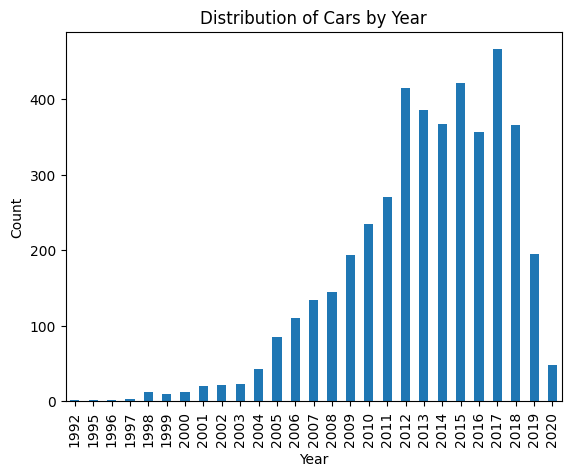

In [8]:
q2 = df['Year'].value_counts().sort_index()
print("\n[Q2] Distribution of Cars by Year of Manufacture:\n", q2)

ax = q2.plot(kind='bar', title='Distribution of Cars by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

# Average Selling Price by Fuel Type

**What is the average selling price for each fuel type?**


[Q3] Average Selling Price by Fuel Type:
 Fuel
CNG         277174.925000
Diesel      669094.252206
Electric    310000.000000
LPG         167826.043478
Petrol      344840.137541
Name: Selling_Price, dtype: float64


Text(0, 0.5, 'Avg Selling Price')

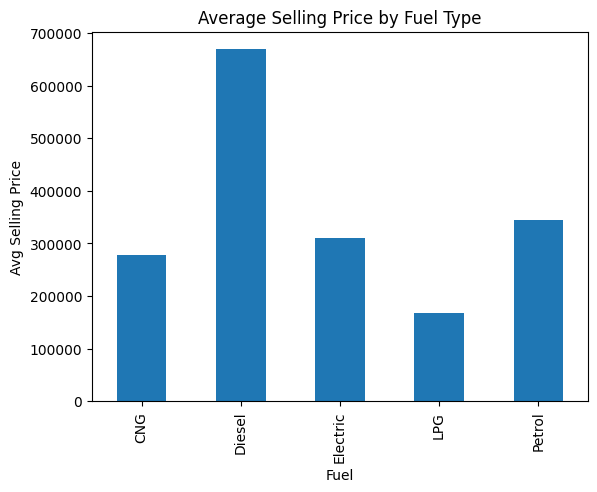

In [9]:
q3 = df.groupby('Fuel')['Selling_Price'].mean()
print("\n[Q3] Average Selling Price by Fuel Type:\n", q3)

ax = q3.plot(kind='bar', title='Average Selling Price by Fuel Type')
ax.set_xlabel('Fuel')
ax.set_ylabel('Avg Selling Price')

# Transmission Type Frequency

**Which transmission type (Manual vs Automatic) is more common?**


[Q4] Transmission Type Frequency:
 Transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


Text(0, 0.5, 'Count')

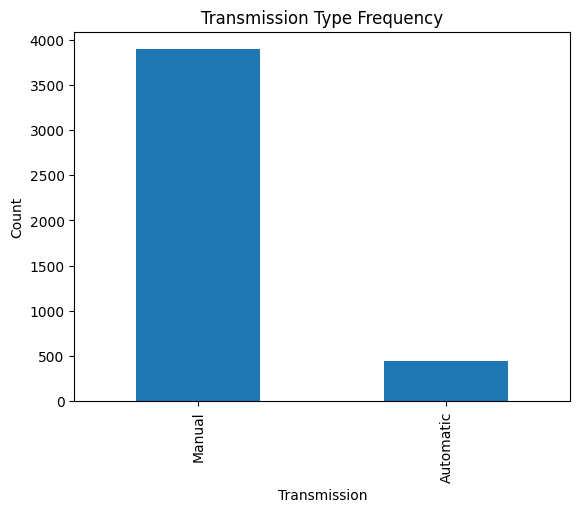

In [10]:
q4 = df['Transmission'].value_counts()
print("\n[Q4] Transmission Type Frequency:\n", q4)

ax = q4.plot(kind='bar', title='Transmission Type Frequency')
ax.set_xlabel('Transmission')
ax.set_ylabel('Count')

# Average Selling Price by Owner Type

**How does the average selling price vary with owner type?**


[Q5] Average Selling Price by Owner Type:
 Owner
First Owner             598636.969633
Fourth & Above Owner    173901.197531
Second Owner            343891.088608
Test Drive Car          954293.941176
Third Owner             269474.003289
Name: Selling_Price, dtype: float64


Text(0, 0.5, 'Avg Selling Price')

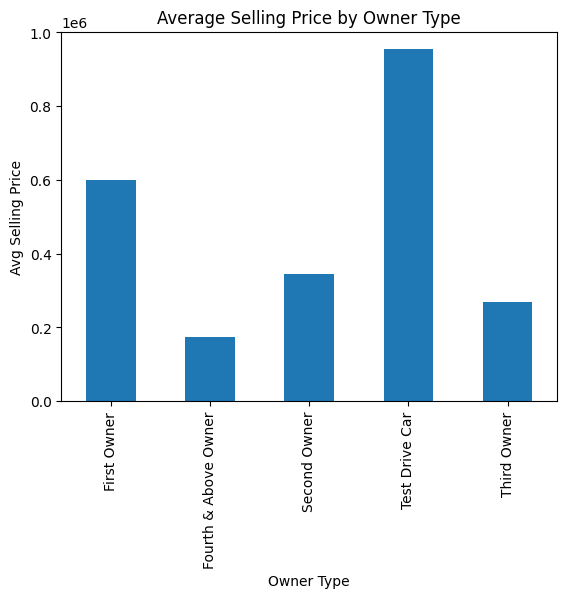

In [11]:
q5 = df.groupby('Owner')['Selling_Price'].mean()
print("\n[Q5] Average Selling Price by Owner Type:\n", q5)

ax = q5.plot(kind='bar', title='Average Selling Price by Owner Type')
ax.set_xlabel('Owner Type')
ax.set_ylabel('Avg Selling Price')

# Top 10 Most Common Car Brands

**What are the top 10 most common car brands?**


[Q6] Top 10 Most Common Car Brands:
 Name
Maruti        1280
Hyundai        821
Mahindra       365
Tata           361
Honda          252
Ford           238
Toyota         206
Chevrolet      188
Renault        146
Volkswagen     107
Name: count, dtype: int64


Text(0, 0.5, 'Count')

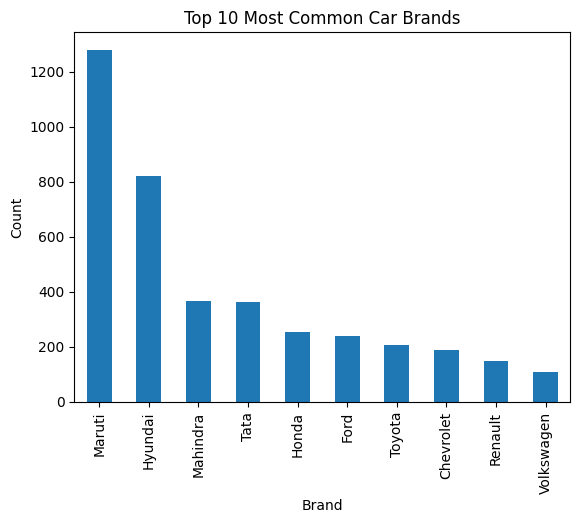

In [12]:
brands = df['Name'].str.split().str[0]
q6 = brands.value_counts().head(10)
print("\n[Q6] Top 10 Most Common Car Brands:\n", q6)

ax = q6.plot(kind='bar', title='Top 10 Most Common Car Brands')
ax.set_xlabel('Brand')
ax.set_ylabel('Count')

# Selling Price vs Kilometers Driven

**What is the relationship between kilometers driven and selling price?**


[Q7] Scatter: Selling Price vs Km_Driven


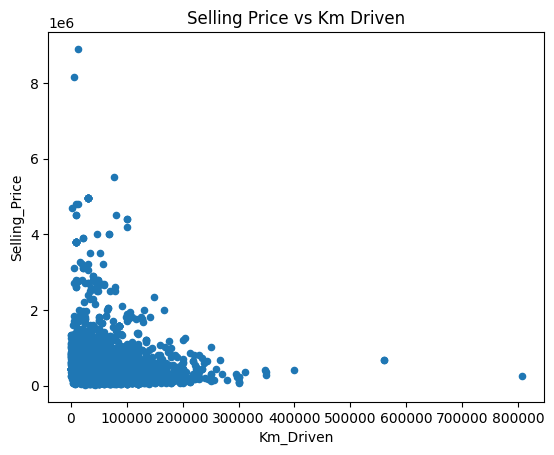

In [13]:
print("\n[Q7] Scatter: Selling Price vs Km_Driven")
ax = df.plot.scatter(x='Km_Driven', y='Selling_Price', title='Selling Price vs Km Driven')

# Average Selling Price by Year

**How do average selling prices vary across different years?**


[Q8] Average Selling Price by Year:
 Year
1992    5.000000e+04
1995    9.500000e+04
1996    2.250000e+05
1997    9.300000e+04
1998    2.140000e+05
1999    7.350000e+04
2000    8.150000e+04
2001    1.176499e+05
2002    9.071429e+04
2003    8.656522e+04
2004    1.217500e+05
2005    1.090130e+05
2006    1.577999e+05
2007    1.628284e+05
2008    1.742013e+05
2009    2.295647e+05
2010    2.696781e+05
2011    2.936383e+05
2012    3.716289e+05
2013    4.848010e+05
2014    5.232316e+05
2015    5.289430e+05
2016    6.083641e+05
2017    7.689098e+05
2018    9.107705e+05
2019    1.059020e+06
2020    8.184791e+05
Name: Selling_Price, dtype: float64


Text(0, 0.5, 'Avg Selling Price')

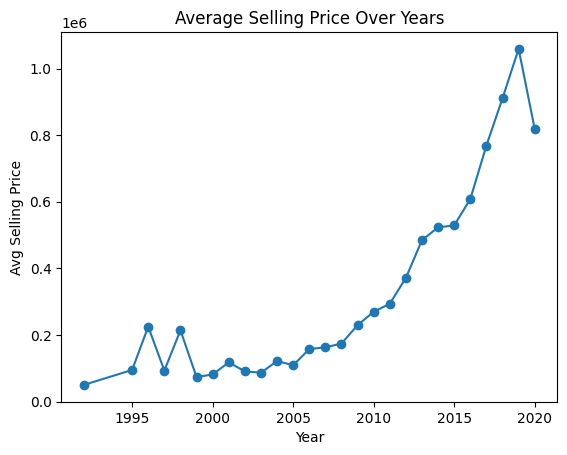

In [14]:
q8 = df.groupby('Year')['Selling_Price'].mean().sort_index()
print("\n[Q8] Average Selling Price by Year:\n", q8)

ax = q8.plot(kind='line', marker='o', title='Average Selling Price Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Avg Selling Price')

# Cars by Seller Type

**What is the count of cars by seller type?**


[Q9] Cars by Seller Type:
 Seller_Type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


Text(0, 0.5, 'Count')

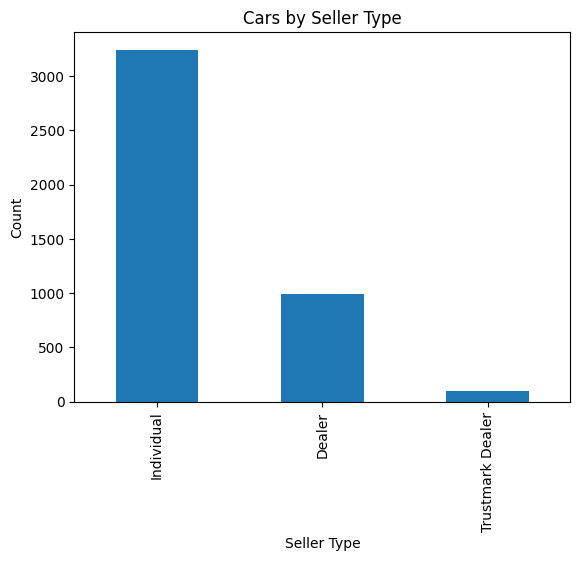

In [15]:
q9 = df['Seller_Type'].value_counts()
print("\n[Q9] Cars by Seller Type:\n", q9)

ax = q9.plot(kind='bar', title='Cars by Seller Type')
ax.set_xlabel('Seller Type')
ax.set_ylabel('Count')

# Fuel Type Distribution among Automatic Cars

**Which fuel type dominates among automatic cars?**


[Q10] Fuel Type Distribution among Automatic Cars:
 Fuel
Diesel      254
Petrol      193
Electric      1
Name: count, dtype: int64


Text(0, 0.5, 'Count (Automatic only)')

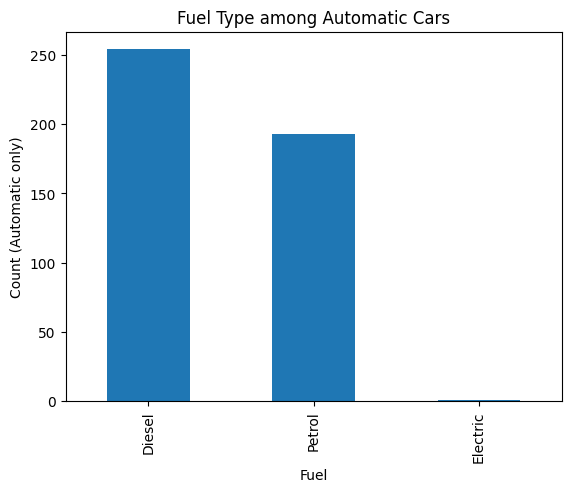

In [16]:
q10 = df.loc[df['Transmission'] == 'Automatic', 'Fuel'].value_counts()
print("\n[Q10] Fuel Type Distribution among Automatic Cars:\n", q10)

ax = q10.plot(kind='bar', title='Fuel Type among Automatic Cars')
ax.set_xlabel('Fuel')
ax.set_ylabel('Count (Automatic only)')

/tmp/ipython-input-2898074010.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dataset', y='Jumlah Baris', data=comparison_df, palette='viridis')


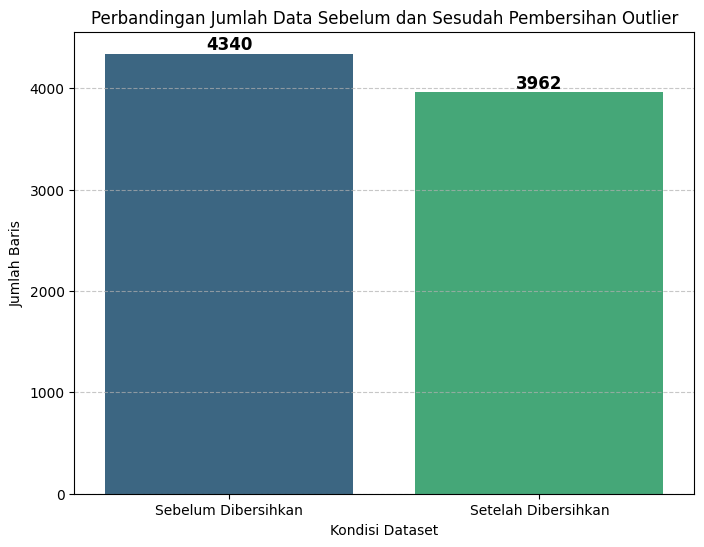

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Langkah 1: Muat dataset asli
df_original = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv')
original_rows = df_original.shape[0]

# Langkah 2: Lakukan pembersihan outlier untuk mendapatkan jumlah baris akhir
df_cleaned = df_original.copy()
df_cleaned.columns = ['Name', 'Year', 'Selling_Price', 'Km_Driven', 'Fuel', 'Seller_Type', 'Transmission', 'Owner']

columns_to_clean = ['Selling_Price', 'Km_Driven']
for col in columns_to_clean:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

cleaned_rows = df_cleaned.shape[0]

# Langkah 3: Buat DataFrame untuk visualisasi
data = {
    'Dataset': ['Sebelum Dibersihkan', 'Setelah Dibersihkan'],
    'Jumlah Baris': [original_rows, cleaned_rows]
}
comparison_df = pd.DataFrame(data)

# Langkah 4: Buat bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Dataset', y='Jumlah Baris', data=comparison_df, palette='viridis')

# Tambahkan nilai di atas setiap bar
for index, value in enumerate(comparison_df['Jumlah Baris']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Perbandingan Jumlah Data Sebelum dan Sesudah Pembersihan Outlier')
plt.ylabel('Jumlah Baris')
plt.xlabel('Kondisi Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
# Langkah 1: Instal library ydata-profiling!pip install -U ydata-profiling

# Langkah 2: Impor library yang diperlukan
import pandas as pd
from ydata_profiling import ProfileReport

# Langkah 3: Muat dataset asli dari file CSV
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv')
df.columns = ['Name', 'Year', 'Selling_Price', 'Km_Driven', 'Fuel', 'Seller_Type', 'Transmission', 'Owner']

# Langkah 4: Buat laporan profiling
profile = ProfileReport(df, title="Vehicle Dataset Profiling Report")

# Langkah 5: Tampilkan laporanprofile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
  Attempting uninstall: multimethod
    Found existing installation: multimethod 2.0
    Uninstalling multimethod-2.0:
      Successfully uninstalled multimethod-2.0
  Attempting uninstall: imagehash
    Found existing installation: ImageHash 4.3.2
    Uninstalling ImageHash-4.3.2:
      Succes

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:01<00:00,  6.94it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]